In [6]:
import pickle
A_FILE_NAME = "A_testing_num_epochs_data.pkl"
TEXTWIDTH = 5.78853# inches

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

## Retrieve data

In [68]:
import wandb
import pandas as pd
import pickle

run_ids = []
with open('A_testing_num_epochs_ids.txt', 'r') as file:
    for line in file:
        run_ids.append(line.strip())


api = wandb.Api()
history_dict = {}
metrics = ["accuracy","eval_loss","train_st2_loss"]
for run_id in run_ids:
    run = api.run(f"ricu/fantastic-umbrella/{run_id}")
    
    # Fetch the 'num_train_epochs' value
    num_train_epochs = run.config['num_train_epochs']
    train_size = run.config["training_size"]
    seed = run.config["seed"]
    
    # Fetch the history and extract the 'accuracy' column
    history = run.scan_history(keys=["accuracy","eval_loss","train_st2_loss"])
    metrics = pd.DataFrame([row for row in history]).add_suffix(f'_{seed}')
    
    if train_size not in history_dict:
        history_dict[train_size] = {}
    # If 'num_train_epochs' is not in the dictionary, add it
    if num_train_epochs not in history_dict[train_size]:
        history_dict[train_size][num_train_epochs] = pd.DataFrame()

    history_dict[train_size][num_train_epochs] = pd.concat([history_dict[train_size][num_train_epochs],metrics],axis=1)
    
for num_train_epochs, accuracy in history_dict.items():
    print(f'num_train_epochs: {num_train_epochs}')
    print(accuracy)
history_dict = {k1: {k2: history_dict[k1][k2] for k2 in sorted(history_dict[k1])} for k1 in sorted(history_dict)}

# history_dict = {k: history_dict[k] for k in sorted(history_dict)}
with open(A_FILE_NAME,'wb') as f:
    pickle.dump(history_dict,f)

num_train_epochs: 64
{400:      accuracy_2  eval_loss_2  train_st2_loss_2  accuracy_1  eval_loss_1  \
0      0.494234     0.706359          0.739064    0.530661     0.757519   
1      0.496614     0.703340          0.712403    0.535603     0.747151   
2      0.498627     0.698396          0.708758    0.544390     0.728611   
3      0.502288     0.691007          0.699641    0.557203     0.703001   
4      0.503936     0.682113          0.687139    0.588504     0.668186   
..          ...          ...               ...         ...          ...   
195    0.734578     1.500529          0.000515    0.678931     1.752211   
196    0.734578     1.500621          0.000532    0.678931     1.752287   
197    0.734578     1.500688          0.000527    0.678931     1.752341   
198    0.734578     1.500728          0.000515    0.678931     1.752376   
199    0.734578     1.500742          0.000515    0.678931     1.752389   

     train_st2_loss_1  accuracy_3  eval_loss_3  train_st2_loss_3  
0    

## Plot data

In [4]:
import pickle
with open(A_FILE_NAME,'rb') as f:
    history_dict = pickle.load(f)

#### Plot median metric at each timestep

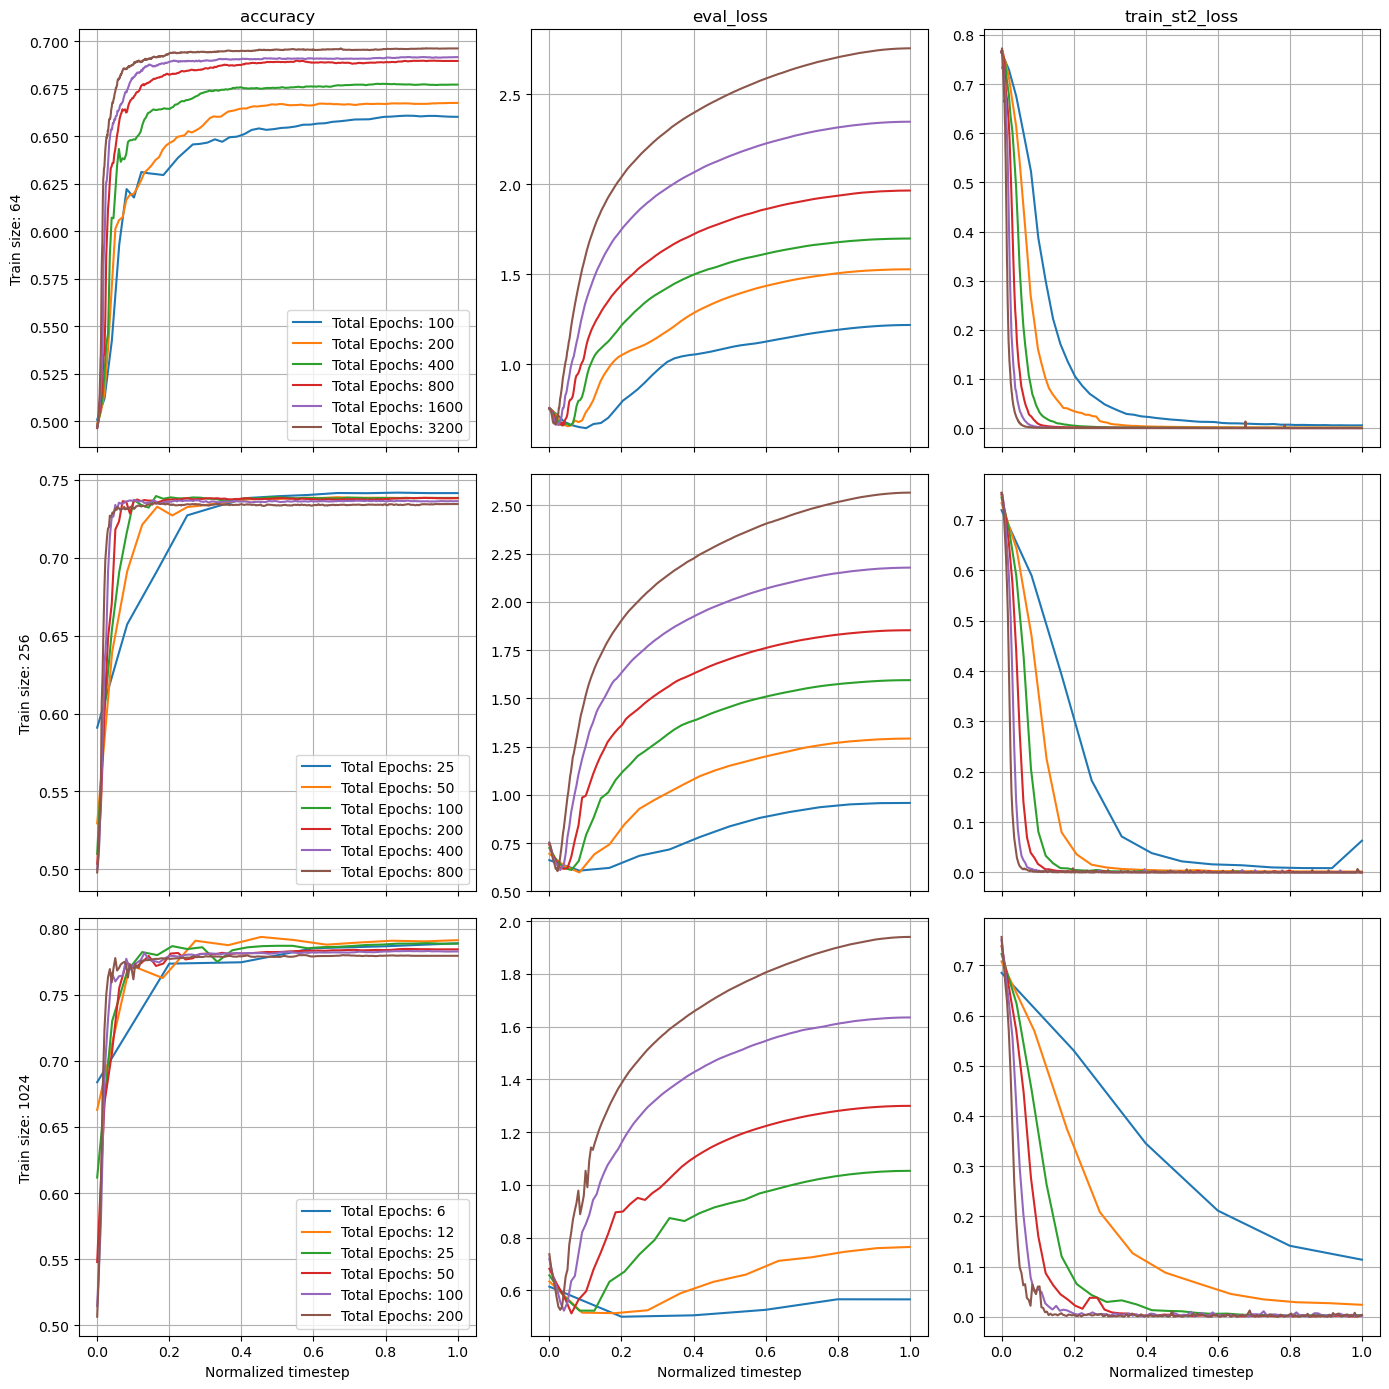

In [9]:
import matplotlib.pyplot as plt

metrics = ['accuracy', 'eval_loss', 'train_st2_loss']

# Create a new figure
fig, axs = plt.subplots(
    3,
    len(metrics),
    sharex=True,
    figsize = (14,14)
    # figsize = (TEXTWIDTH,TEXTWIDTH)
    )

for idx, (train_size, sub_dict) in enumerate(history_dict.items()):
    for idy, metric in enumerate(metrics):
        for num_train_epochs, history_df in sub_dict.items():
            metric_columns = history_df.filter(regex=f'{metric}_').copy()
            # Compute the mean, standard deviation, and median
            metric_columns['mean'] = metric_columns.mean(axis=1)
            metric_columns['std'] = metric_columns.std(axis=1)
            metric_columns['median'] = metric_columns.median(axis=1)
        
            # Normalize the index (timesteps) to a range from 0 to 1
            normalized_index = metric_columns.index / metric_columns.index.max()
            # Plot the median on the respective subplot
            axs[idx,idy].plot(normalized_index, metric_columns['mean'], label=f'Total Epochs: {num_train_epochs}')
            
            # Add a shaded region for the standard deviation
            # axs[idx,idy].fill_between(normalized_index, (metric_columns['median'] - metric_columns['std']), (metric_columns['median'] + metric_columns['std']), alpha=0.2)
        if idx == 0:
            axs[idx,idy].set_title(metric)
        if idy == 0:
            axs[idx,idy].set_ylabel(f'Train size: {train_size}')
        if idx == len(history_dict) - 1:
            axs[idx,idy].set_xlabel('Normalized timestep')
            # axs[idx,idy].set_xlabel('Epoch')

        axs[idx,idy].grid(True,which='major')
        axs[idx,idy].grid(True,which='minor')

        if idy == 0:
            axs[idx,idy].legend()

# Show the plot
plt.tight_layout()
# plt.savefig('A_testing_num_epochs_plot_normalized.pdf', format='pdf')
plt.show()

#### Plot curve of median of best accuracy

KeyError: 'accuracy_2'

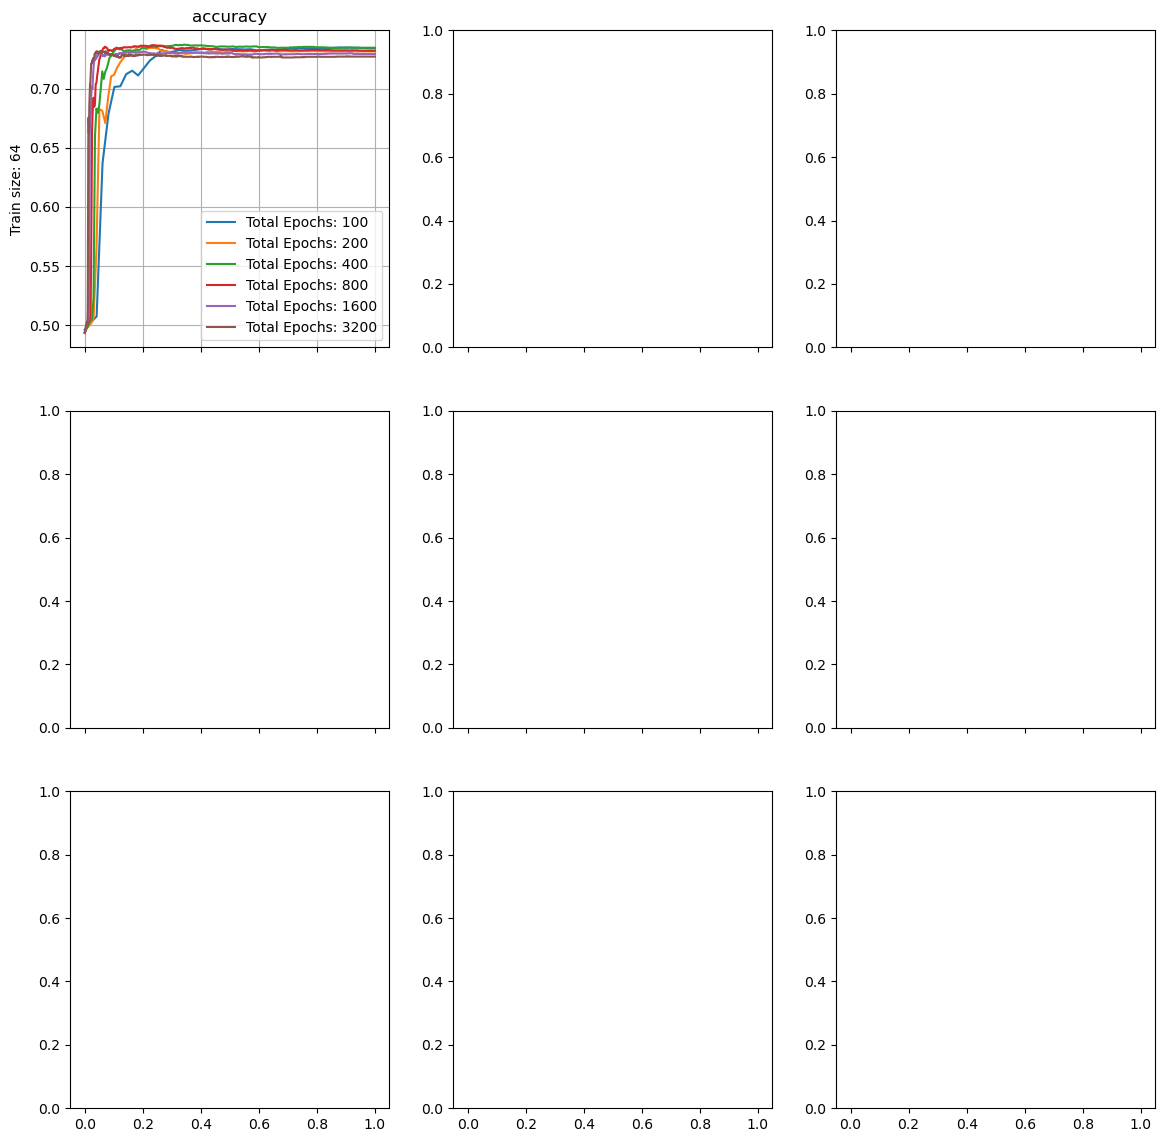

In [13]:
import matplotlib.pyplot as plt

metrics = ['accuracy', 'eval_loss', 'train_st2_loss']

# Create a new figure
fig, axs = plt.subplots(
    3,
    len(metrics),
    sharex=True,
    figsize = (14,14)
    # figsize = (TEXTWIDTH,TEXTWIDTH)
    )


for idx, (train_size, sub_dict) in enumerate(history_dict.items()):
    best_acc_index = {}
    for idy, metric in enumerate(metrics):
        
        for num_train_epochs, history_df in sub_dict.items():
            metric_columns = history_df.filter(regex=f'{metric}_').copy()
            if metric == 'accuracy':
                best_acc_index[num_train_epochs] = metric_columns.max(axis=0).idxmax()



            metric_columns = metric_columns[best_acc_index[num_train_epochs]]
            # Compute the mean, standard deviation, and median
            # metric_columns['mean'] = metric_columns.mean(axis=1)
            # metric_columns['std'] = metric_columns.std(axis=1)
            # metric_columns['median'] = metric_columns.median(axis=1)
        
            # Normalize the index (timesteps) to a range from 0 to 1
            normalized_index = metric_columns.index / metric_columns.index.max()
            # Plot the median on the respective subplot
            axs[idx,idy].plot(normalized_index, metric_columns, label=f'Total Epochs: {num_train_epochs}')
            
            # Add a shaded region for the standard deviation
            # axs[idx,idy].fill_between(normalized_index, (metric_columns['median'] - metric_columns['std']), (metric_columns['median'] + metric_columns['std']), alpha=0.2)
        if idx == 0:
            axs[idx,idy].set_title(metric)
        if idy == 0:
            axs[idx,idy].set_ylabel(f'Train size: {train_size}')
        if idx == len(history_dict) - 1:
            axs[idx,idy].set_xlabel('Normalized timestep')
            # axs[idx,idy].set_xlabel('Epoch')

        axs[idx,idy].grid(True,which='major')
        axs[idx,idy].grid(True,which='minor')

        if idy == 0:
            axs[idx,idy].legend()

# Show the plot
plt.tight_layout()
# plt.savefig('A_testing_num_epochs_plot_normalized.pdf', format='pdf')
plt.show()